<a href="https://colab.research.google.com/github/Imranio07/31github/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install yfinance

In [18]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
stocks = input("Enter the code of the stock")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stockGC=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [23]:
data.shape

(3281, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3281 non-null   float64
 1   High    3281 non-null   float64
 2   Low     3281 non-null   float64
 3   Close   3281 non-null   float64
 4   Volume  3281 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [25]:
data.describe()

,Open,High,Low,Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


Text(0.5, 1.0, 'GC=F Price Series')

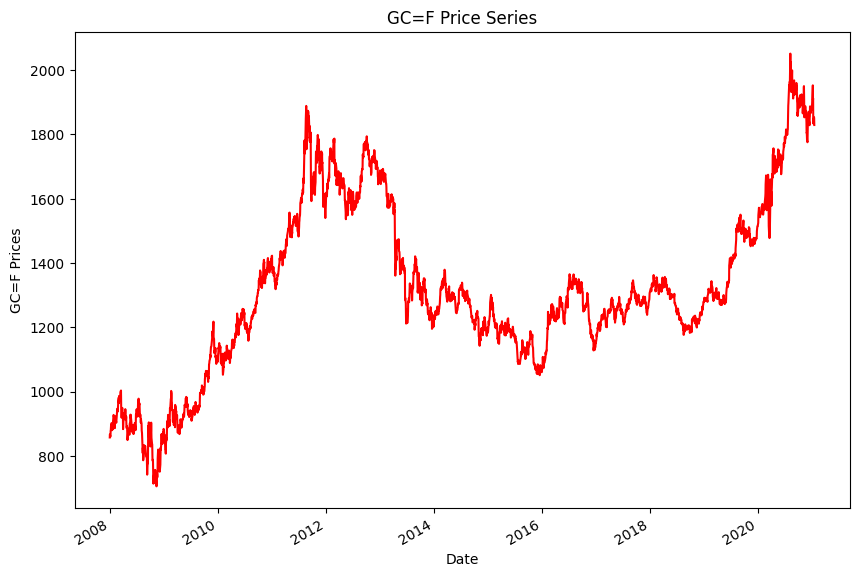

In [26]:
data.Close.plot(figsize=(10, 7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))

<ipython-input-27-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

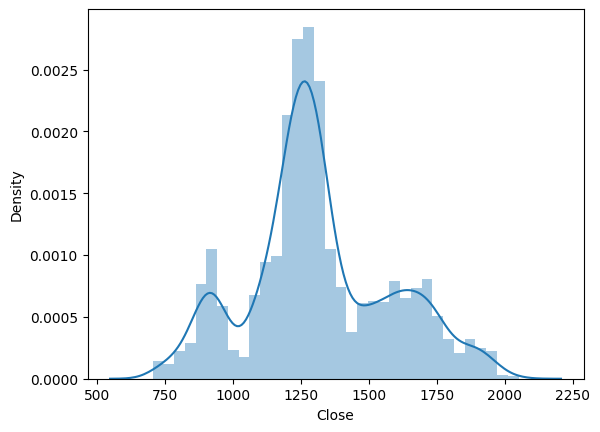

In [27]:
sns.distplot(data["Close"])

<ipython-input-28-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

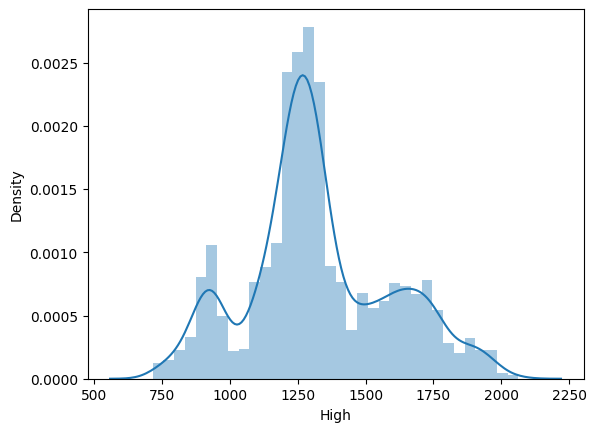

In [28]:
sns.distplot(data["High"])

In [29]:
#Conclusions

# - shape the of the data
# - how our data is disturbuted
# - IT's very very non linear


# Linear, Logis, Regularized, SVM,
X = data.drop("Close", axis=1)
y=data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2624, 4)
(657, 4)
(2624,)
(657,)


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1=lr.predict(X_test)

In [35]:
#MSE---> Means Squared
#RMSE ---> sqrt(MSE)
#r2_square ----> 1.0 #good model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2_scors = r2_score(y_test, y_pred)

  print("MSE:-", mse)
  print("RMSE", rmse)
  print("R2_score:-", r2_scors)


calculate_metrics(y_test, pred1)


  # y_test:- ground truth
  # y_pred:- model predict

MSE:- 27.472312298997597
RMSE 5.2414036573228735
R2_score:- 0.9995883344184746


In [36]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e+04, tolerance: 1.826e+04
  model = cd_fast.enet_coordinate_descent(


In [36]:
calculate_metrics(y_test, la_p)

In [37]:
calculate_metrics(y_test, ri_p)

MSE:- 27.472342705437132
RMSE 5.241406557922895
R2_score:- 0.9995883339628419


In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 0.0001],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.028 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.019 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.028 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.009 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.019 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 0.0001],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [42]:
import joblib

joblib.dump(ri, 'model.pkl')

ridge_from_joblib = model = joblib.load("model.pkl")